Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8434 - loss: 0.5157 - val_accuracy: 0.8987 - val_loss: 0.3914
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8892 - loss: 0.3946 - val_accuracy: 0.8666 - val_loss: 0.4278
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.8917 - loss: 0.3884 - val_accuracy: 0.8573 - val_loss: 0.4693
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8951 - loss: 0.3877 - val_accuracy: 0.8996 - val_loss: 0.4958
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8928 - loss: 0.3978 - val_accuracy: 0.8939 - val_loss: 0.3721
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8937 - loss: 0.3987 - val_accuracy: 0.9062 - val_loss: 0.3198
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8970 - loss: 0.3740 - val_accuracy: 0.8870 - val_loss: 0.4474
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8914 - loss:

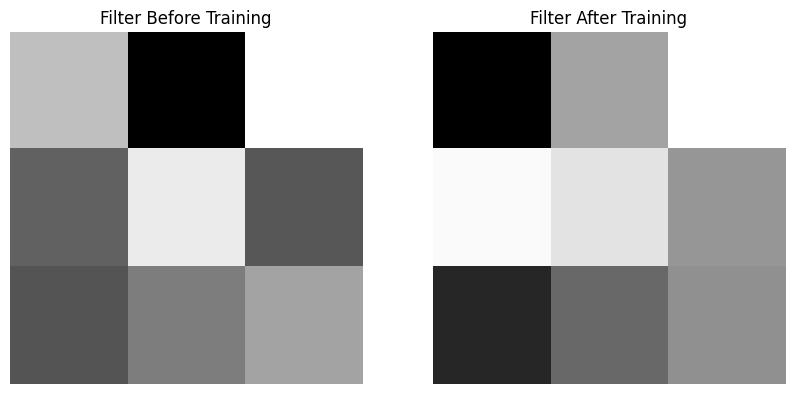

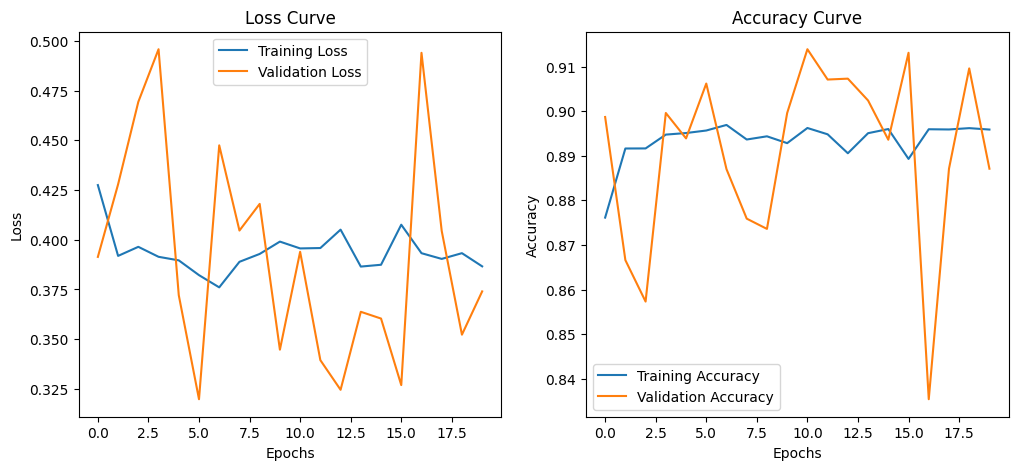

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

inputs = keras.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(filters=3, kernel_size=(3, 3), activation="relu", name="conv1")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(conv_layer)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

initial_weights = model.layers[1].get_weights()[0] 
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
final_weights = model.layers[1].get_weights()[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(initial_weights[:, :, 0, 0], cmap="gray")
axes[0].set_title("Filter Before Training")
axes[0].axis("off")
axes[1].imshow(final_weights[:, :, 0, 0], cmap="gray")
axes[1].set_title("Filter After Training")
axes[1].axis("off")
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(history.history["loss"], label="Training Loss")
ax[0].plot(history.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Curve")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Curve")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()
